# <b>Laplace Equation:Elliptical</b>
$$\frac{\partial^{2} u}{\partial x^2} + \frac{\partial^{2} u}{\partial y^2} =0$$

$$u_{ij}=\frac{1}{4}(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1})$$

In [5]:
#finite differences:Gauss jacobi 
import numpy as np
N=20
U=np.empty([N,N])
T=np.zeros([N,N])
U[0,:N]=100
iterations=0
tolerance=.00001
precesion=np.inf
while precesion>tolerance:
    T=np.copy(U)
    iterations+=1 
    for i in range(1,N-1):
        for j in range(1,N-1):
            U[i][j]=.25*(T[i+1][j]+T[i][j+1]+T[i][j-1]+T[i-1][j])
    precesion=np.max(np.abs(U-T))

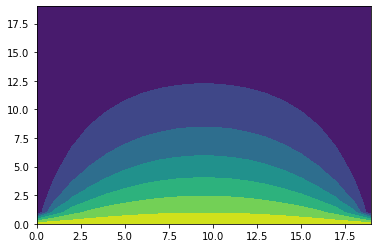

In [6]:
import matplotlib.pyplot as plt
plt.contourf(T)

In [7]:
print(iterations)

796


In [8]:
#finite differences:Gauss seidel 
import numpy as np
N=20
U=np.empty([N,N])
T=np.zeros([N,N])
U[0,:N]=100
iterations=0
tolerance=.00001
precesion=np.inf
while precesion>tolerance:
    T=np.copy(U)
    iterations+=1 
    for i in range(1,N-1):
        for j in range(1,N-1):
            U[i][j]=.25*(U[i+1][j]+U[i][j+1]+U[i][j-1]+U[i-1][j])
    precesion=np.max(np.abs(U-T))

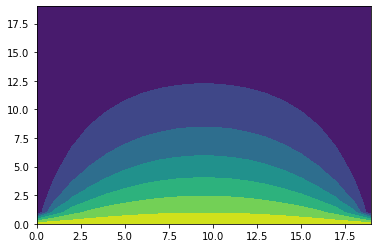

In [9]:
import matplotlib.pyplot as plt
plt.contourf(T)

In [10]:
print(iterations)

420


# <b>Heat Equation- 1D Parabolic</b>
$$\frac{\partial u}{\partial t}=\alpha \frac{\partial^2 u}{\partial x^2}$$
Explicit method(using forward difference)
$$u_{i,j+1}=\gamma u_{i-1,j}+(1-2\gamma) u_{i,j}+\gamma u_{i+1,j}$$
where,
$$\gamma=\frac{\alpha k}{h^2}$$

Implicit method (using backward difference)
$$u_{i,j}=-\gamma u_{i-1,j+1}+(1+2\gamma) u_{i,j+1}-\gamma u_{i+1,j+1}$$

$$\frac{dt}{dx^2}<\frac{1}{2}$$

In [20]:
h=0.025
k=0.00025
x=np.arange(0,1+h,h)
t=np.arange(0,0.1+k,k)
N=50

n=len(x)
m=len(t)
T=np.zeros((n,m))


#initial condition
T[0,:]=100.0

#boundary condition
T[0,0]=0
T[-1,:]=0
a=k/h**2
T

array([[  0., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [21]:
for k in range(0,100):
    for j in range(1,m):
        for i in range(1,n-1):
            T[i,j]= a*T[i-1,j-1] + (1-2*a)*T[i,j-1] + a*T[i+1,j-1]

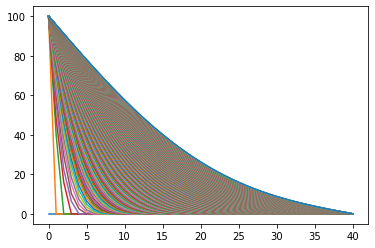

In [22]:
plt.plot(T)
plt.show()